### Notas de aula de Mecânica Quântica <br> Autor: Jonas Maziero

# Potencial poço quadrado finito
O potencial de um quanton em uma caixa unidimensional é
\begin{cases}
U(x<0)= U_{0}, \\
U(0<x<a) = 0, \\
U(x>a) = U_{0},
\end{cases}
com $U_{0}$ finito. Para esse potencial, a forma geral das soluções da EqSIT1D,
\begin{equation}
-\frac{\hbar^{2}}{2m}\partial_{xx}\Xi(x)+U(x)\Xi(x)=E\Xi(x) \ \therefore\ \partial_{xx}\Xi(x)+k^{2}\Xi(x)=0
\end{equation}
com 
$$k=\sqrt{2m(E-U(x))}/\hbar,$$
podem ser escritas como segue:
\begin{equation}
\Xi(x)=c_{d}e^{ikx}+c_{e}e^{-ikx}.
\end{equation}

## $E>U_{0}$
Nesse caso o problema vira um problema de espalhamento. As soluções para as três regiões podem ser escritas na forma
\begin{cases}
\Xi_{e}(x<0) = c_{ed}e^{ik_{e}x}+c_{ee}e^{-ik_{e}x}, \\
\Xi_{i}(0<x<a) = c_{id}e^{ik_{i}x}+c_{ie}e^{-ik_{i}x}, \\
\Xi_{d}(x>a) = c_{dd}e^{ik_{e}x}+c_{de}e^{-ik_{e}x}, \\
\end{cases}
com
\begin{equation}
k_{e} = \frac{\sqrt{2m(E-U_{0})}}{\hbar} \text{ e } k_{i} = \frac{\sqrt{2mE}}{\hbar}.
\end{equation}

Como com os outros problemas desse tipo, que vimos anteriormente, vamos considerar o quanton movimentando-se inicialmente na região $x<0$ da esquerda para a direita, i.e., a intensidade do feixe incidente é dada por $|c_{ed}|^{2}$. Novamente, como depois de passar para a região $x>a$ não há motivo para o quanton retornar para a esquerda, fazemos
\begin{equation}
c_{de}:=0.
\end{equation}
Para determinar os outros coeficientes em termos de $c_{ed}$ impomos a continuidade da função de onda
\begin{align}
& \Xi_{e}(x=0)=\Xi_{i}(x=0) \therefore c_{ed}+c_{ee}=c_{id}+c_{ie}, \\
& \Xi_{i}(x=a)=\Xi_{d}(x=a) \therefore c_{id}e^{ik_{i}a}+c_{ie}e^{-ik_{i}a} = c_{dd}e^{ik_{e}a},
\end{align}
Para $U_{0}$ finito, a primeira derivada da função de onda,
\begin{align}
&\partial_{x}\Xi_{e} = ik_{e}\left(c_{ed}e^{ik_{e}x}-c_{ee}e^{-ik_{e}x}\right), \\
&\partial_{x}\Xi_{i} = ik_{i}\left(c_{id}e^{ik_{i}x}-c_{ie}e^{-ik_{i}x}\right), \\
&\partial_{x}\Xi_{d} = ik_{e}c_{dd}e^{ik_{e}x},
\end{align}
também deve ser contínua:
\begin{align}
& \partial_{x}\Xi_{e}(x=0)=\partial_{x}\Xi_{i}(x=0) \therefore ik_{e}(c_{ed}-c_{ee})=ik_{i}(c_{id}-c_{ie}), \\
& \partial_{x}\Xi_{i}(x=a)=\partial_{x}\Xi_{d}(x=a) \therefore ik_{i}\left(c_{id}e^{ik_{i}a}-c_{ie}e^{-ik_{i}a}\right) = ik_{e}c_{dd}e^{ik_{e}a}.
\end{align}
A solução desse sistema de equações lineares não homogêneo é obtido usando o código abaixo.

In [4]:
from sympy import init_printing, symbols, solve, exp
init_printing(use_unicode=True)

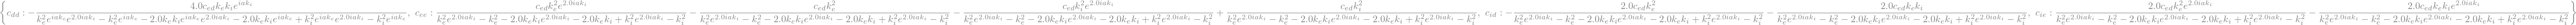

In [6]:
ced,cee,cid,cie,cdd=symbols('c_{ed},c_{ee},c_{id},c_{ie},c_{dd}')
ke,ki,a = symbols('k_{e},k_{i},a')
solve([ced+cee-cid-cie, 
       cid*exp(1j*ki*a)+cie*exp(-1j*ki*a)-cdd*exp(1j*ke*a), 
       ke*(ced-cee)-ki*(cid-cie),
      ki*(cid*exp(1j*ki*a)-cie*exp(-1j*ki*a))-ke*cdd*exp(1j*ke*a)],
      [cee,cid,cie,cdd])

O coeficiente de transmissão é obtido a partir do coeficiente 
\begin{align}
c_{dd} & = \frac{c_{ed}4k_{e}k_{i}e^{-iak_{e}}e^{iak_{i}}}{(k_{e}^{2}+k_{i}^{2})(1-e^{2iak_{i}})+2k_{i}k_{e}(1+e^{2iak_{i}})} \\
& = \frac{c_{ed}e^{-iak_{e}}}{\frac{k_{e}^{2}+k_{i}^{2}}{2k_{e}k_{i}}\frac{e^{-iak_{i}}-e^{iak_{i}}}{2}+\frac{e^{-iak_{i}}+e^{iak_{i}}}{2}} \\
& = \frac{c_{ed}e^{-iak_{e}}}{-i\frac{k_{e}^{2}+k_{i}^{2}}{2k_{e}k_{i}}\sin(ak_{i})+\cos(ak_{i})}
\end{align}
e é dado por
\begin{align}
T & = \frac{|c_{dd}|^{2}}{|c_{ed}|^{2}} \\
& = \left(\frac{(k_{e}^{2}+k_{i}^{2})^{2}}{4k_{e}^{2}k_{i}^{2}}\sin^{2}(ak_{i})+\cos^{2}(ak_{i})\right)^{-1} \\
&= \left(\frac{k_{e}^{4}+k_{i}^{4}-2k_{e}^{2}k_{i}^{2}+4k_{e}^{2}k_{i}^{2}}{4k_{e}^{2}k_{i}^{2}}\sin^{2}(ak_{i})+\cos^{2}(ak_{i})\right)^{-1}  \\ 
& = \left(\frac{(k_{e}^{2}-k_{i}^{2})^{2}}{4k_{e}^{2}k_{i}^{2}}\sin^{2}(ak_{i})+1\right)^{-1}.
\end{align}
Na figura abaixo está mostrado $T=T(E/U_{0})$ para energias $E>U_{0}$ quaisquer.

In [9]:
from ipywidgets import interactive
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [11]:
def T_EgtU0(a):
    matplotlib.rcParams.update({'font.size':12})
    #plt.figure(figsize = (5,3), dpi = 100)
    U0 = 1; m = 1; hbb = 1
    x = np.arange(1.001,10,0.005); 
    ki = np.sqrt(2*m*x)/hbb; ke = np.sqrt(1-U0/x)*ki
    T = 1/(1+((np.sin(ki*a)**2)*((ke**2-ki**2)**2/(4*ke**2*ki**2))))
    R = 1-T
    plt.plot(x,R); plt.plot(x,T); plt.xlim(0.95,10)
    plt.ylim(-0.02,1.02); plt.xlabel(r'$E/U_{0}$')
    plt.legend((r'$R$',r'$T$'),loc=(1.01,0.4))
    plt.annotate(r'$a=$'+str(a)[:5], xy=(10,0.9), 
                 xytext=(10.1,0.9), fontsize=12)
    plt.show()
interactive(T_EgtU0, a=(0.05,10,0.1))

interactive(children=(FloatSlider(value=4.95, description='a', max=10.0, min=0.05), Output()), _dom_classes=('…

### Efeito Ramsauer-Townsend
Vemos na expressão acima que $T=1$ quando $\sin(ak_{i})=0$, o que é obtido quando $ak_{i}=n\pi$ com $n=1,2,3,\cdots$. Mas, como $k_{i}=\sqrt{2mE}/\hbar$, essa condição é equivalente ao quanton ter inicialmente as energias
\begin{equation}
E=\frac{\hbar^{2}k_{i}^{2}}{2m} = \left(\frac{\hbar^{2}\pi^{2}}{2m a^{2}}\right)n^{2},
\end{equation}
que é igual à expressão para a energia de um quanton em um potencial poço quadrado infinito. Esse fenômeno já foi verificado experimentalmente. Veja e.g. (https://doi.org/10.1119/1.1975094).

## $E<U_{0}$
Nesse caso, vamos definir
\begin{equation}
k_{d}:=ik_{e} = \frac{\sqrt{2m(U_{0}-E)}}{\hbar}>0.
\end{equation}
Assim $\Xi_{e}(x<0) = c_{ed}e^{k_{d}x}+c_{ee}e^{-k_{d}x}$ e como $\lim_{x\rightarrow -\infty}e^{-k_{d}x}=\infty$ fazemos
\begin{equation}
c_{ee} :=0\therefore\Xi_{e}(x<0) = c_{ed}e^{k_{d}x}.
\end{equation}

Já para $\Xi_{d}(x>a) = c_{dd}e^{k_{d}x}+c_{de}e^{-k_{d}x}$ temos que $\lim_{x\rightarrow \infty}e^{k_{d}x}=\infty$ e por isso impomos que
\begin{equation}
c_{dd}:= 0 \therefore \Xi_{d}(x>a) = c_{de}e^{-k_{d}x}.
\end{equation}

Usando as derivadas
\begin{cases}
\partial_{x}\Xi_{e}(x<0) = k_{d}c_{ed}e^{k_{d}x}, \\
\partial_{x}\Xi_{i}(0<x<a) = ik_{i}\left(c_{id}e^{ik_{i}x}-c_{ie}e^{-ik_{i}x}\right), \\
\partial_{x}\Xi_{d}(x>a) = -k_{d}c_{de}e^{-k_{d}x}, \\
\end{cases}

aplicamos a continuidade da função de onda e de sua derivada primeira nas fronteiras:
\begin{align}
& (\star) \hspace{1cm} \Xi_{e}(x=0)=\Xi_{i}(x=0) \therefore c_{ed} = c_{id}+c_{ie}, \\
& (*) \hspace{1cm} \partial_{x}\Xi_{e}(x=0)=\partial_{x}\Xi_{i}(x=0) \therefore k_{d}c_{ed} = ik_{i}(c_{id}-c_{ie}), \\
& (\star\star) \hspace{1cm} \Xi_{i}(x=a)=\Xi_{d}(x=a) \therefore c_{id}e^{ik_{i}a}+c_{ie}e^{-ik_{i}a} = c_{de}e^{-k_{d}a}, \\
& (**) \hspace{1cm} \partial_{x}\Xi_{i}(x=a)=\partial_{x}\Xi_{d}(x=a) \therefore ik_{i}\left(c_{id}e^{ik_{i}a}-c_{ie}e^{-ik_{i}a}\right) = -k_{d}c_{de}e^{-k_{d}a}.
\end{align}

Substituindo a eq. ($\star$) na eq. ($*$) obteremos
\begin{align}
& k_{d}c_{ed}= k_{d}(c_{id}+c_{ie}) = ik_{i}(c_{id}-c_{ie}) \therefore c_{ie}(k_{d}+ik_{i})=c_{id}(ik_{i}-k_{d}) \\
& c_{ie} = \frac{ik_{i}-k_{d}}{ik_{i}+k_{d}}c_{id}.
\end{align}
Desse último resultado temos que 
$$|c_{ie}|=|c_{id}|,$$
o que indica a formação de uma onda estacionária na região $0<x<a$. Podemos confirmar isso substituindo essa última relação na função de onda:
\begin{align}
\Xi_{i}(0<x<a) & = c_{id}e^{ik_{i}x}+\frac{ik_{i}-k_{d}}{ik_{i}+k_{d}}c_{id}e^{-ik_{i}x} \\
& = c_{id}\frac{ik_{i}+k_{d}}{ik_{i}+k_{d}}e^{ik_{i}x}+\frac{ik_{i}-k_{d}}{ik_{i}+k_{d}}c_{id}e^{-ik_{i}x} \\
& = \frac{c_{id}ik_{i}}{ik_{i}+k_{d}}\left(e^{ik_{i}x}+e^{-ik_{i}x}\right) + \frac{c_{id}k_{d}}{ik_{i}+k_{d}}\left(e^{ik_{i}x}-e^{-ik_{i}x}\right) \\
& = \frac{2c_{id}ik_{i}}{ik_{i}+k_{d}}\cos(k_{i}x) + \frac{2ic_{id}k_{d}}{ik_{i}+k_{d}}\sin(k_{i}x) \\
& =: A\sin(k_{i}x) + B\cos(k_{i}x).
\end{align}

### Usando a simetria de $U(x)$
Pela _simetria do potencial_ em relação aos pontos $x=0$ e $x=a$, ou melhor, pela simetria de $U(x)$ em relação ao ponto $x=1/2$, temos que a função de onda deve ser uma função par ou ímpar. Por isso as densidades de probabilidade devem ser as mesmas em:
\begin{align}
& |\Xi_{e}(x=0)|^{2} = |\Xi_{d}(x=a)|^{2} \therefore |c_{ed}e^{k_{d}0}|^{2} = |c_{de}e^{-k_{d}a}|^{2} \\
& \therefore |c_{ed}|^{2} = |c_{de}|^{2}e^{-2k_{d}a}.
\end{align}

Substituindo $c_{ie}$ na eq. ($\star$) obtemos
\begin{align}
c_{ed} & = c_{id}+c_{ie} = c_{id} + \frac{ik_{i}-k_{d}}{ik_{i}+k_{d}}c_{id} = \left(\frac{ik_{i}+k_{d}+ik_{i}-k_{d}}{ik_{i}+k_{d}}\right)c_{id} \\
& = \frac{2ik_{i}}{ik_{i}+k_{d}}c_{id}.
\end{align}

### Condição obtida a partir de $\Xi_{i}(x=a)=\Xi_{d}(x=a)$
Da equação ($\star\star$) temos que
\begin{equation}
c_{de} = e^{k_{d}a}\left(c_{id}e^{ik_{i}a}+c_{ie}e^{-ik_{i}a}\right) = \frac{e^{k_{d}a}2ik_{i}c_{id}}{ik_{i}+k_{d}}\left(\cos(k_{i}a) + \frac{k_{d}}{k_{i}}\sin(k_{i}a)\right).
\end{equation}

Das equações acima para $c_{ed}$ e para $c_{de}$ temos que
\begin{equation}
|c_{de}|^{2} = e^{2k_{d}a}\left|\frac{2ik_{i}c_{id}}{ik_{i}+k_{d}}\right|^{2}\left(\cos(k_{i}a) + \frac{k_{d}}{k_{i}}\sin(k_{i}a)\right)^{2} = e^{2k_{d}a}|c_{ed}|^{2}\left(\cos(k_{i}a) + \frac{k_{d}}{k_{i}}\sin(k_{i}a)\right)^{2}.
\end{equation}
Portanto devemos ter
\begin{align}
& \cos(k_{i}a) + \frac{k_{d}}{k_{i}}\sin(k_{i}a)=1 \\
& \therefore \cos^{2}(k_{i}a/2)-\sin^{2}(k_{i}a/2)+ \frac{k_{d}}{k_{i}}2\sin(k_{i}a/2)\cos(k_{i}a/2) =\cos^{2}(k_{i}a/2)+\sin^{2}(k_{i}a/2) \\
& \frac{k_{d}}{k_{i}}2\sin(k_{i}a/2)\cos(k_{i}a/2) = 2\sin^{2}(k_{i}a/2) \\
& \therefore k_{d}=k_{i}\tan(k_{i}a/2),
\end{align}
que é uma equação transcendental válida se $\sin(k_{i}a/2)\ne 0$ e $\cos(k_{i}a/2)\ne 0$.

### Condição obtida a partir de $\partial_{x}\Xi_{i}(x=a)=\partial_{x}\Xi_{d}(x=a)$
Da eq. ($**$), $c_{id}e^{ik_{i}a}+c_{ie}e^{-ik_{i}a} = c_{de}e^{-k_{d}a}$, e usando $c_{ie}=\frac{ik_{i}-k_{d}}{ik_{i}+k_{d}}c_{id}$, teremos
\begin{align}
c_{de} &= -e^{k_{d}a}\frac{ik_{i}}{k_{d}}\left(c_{id}e^{ik_{i}a}-\frac{ik_{i}-k_{d}}{ik_{i}+k_{d}}c_{id}e^{-ik_{i}a}\right) \\
& = \frac{-e^{k_{d}a}ik_{i}c_{id}}{k_{d}(ik_{i}+k_{d})}\left((ik_{i}+k_{d})e^{ik_{i}a}-(ik_{i}-k_{d})e^{-ik_{i}a}\right) \\
& = \frac{-e^{k_{d}a}ik_{i}c_{id}}{k_{d}(ik_{i}+k_{d})}\left(ik_{i}\left(e^{ik_{i}a}-e^{-ik_{i}a}\right)+k_{d}\left(e^{ik_{i}a}+e^{-ik_{i}a}\right)\right) \\
& = \frac{-e^{k_{d}a}2ik_{i}c_{id}}{ik_{i}+k_{d}}\left(-\frac{k_{i}}{k_{d}}\sin(k_{i}a)+\cos(k_{i}a)\right) \\
& =: \tilde{c}_{de}.
\end{align}

Aplicando novamente a condição $|c_{ed}|^{2} = |\tilde{c}_{de}|^{2}e^{-2k_{d}a}$, que vem da simetria do potencial, vemos que devemos ter
\begin{align}
& -\frac{k_{i}}{k_{d}}\sin(k_{i}a)+\cos(k_{i}a) = 1, \\
& \therefore -\frac{k_{i}}{k_{d}}2\sin(k_{i}a/2)\cos(k_{i}a/2)+\cos^{2}(k_{i}a/2)-\sin^{2}(k_{i}a/2) = \cos^{2}(k_{i}a/2)+\sin^{2}(k_{i}a/2), \\
& \therefore -\frac{k_{i}}{k_{d}}2\sin(k_{i}a/2)\cos(k_{i}a/2)=2\sin^{2}(k_{i}a/2), \\
& \therefore k_{i}\cot(k_{i}a/2)=-k_{d},
\end{align}
que é uma equação transcendental válida se $\sin(k_{i}a/2)\ne 0$ e $\cos(k_{i}a/2)\ne 0$.

### Existem 2 classes de soluções
No entando, das equações $k_{i}\tan(k_{i}a/2)=k_{d}$ e $k_{i}\cot(k_{i}a/2)=-k_{d}$ teremos:
\begin{align}
& k_{i}\tan(k_{i}a/2)+k_{i}\cot(k_{i}a/2)=k_{d}-k_{d}=0, \\
& \therefore \tan(k_{i}a/2)\tan(k_{i}a/2)+\cot(k_{i}a/2)\tan(k_{i}a/2)=0, \\
& \therefore \tan^{2}(k_{i}a/2)+1=0, \\
& \therefore \tan^{2}(k_{i}a/2)=-1,
\end{align}
o que __não pode ser satisfeita__. Portanto, as condições de continuidade $\Xi(x=a)=\Xi_{d}(x=a)$ e $\partial_{x}\Xi(x=a)=\partial_{x}\Xi_{d}(x=a)$ não podem ser satisfeitas simultaneamente. Por isso, separaremos as soluções em duas classes:
\begin{cases}
\text{Classe F: } \Xi(x=a)=\Xi_{d}(x=a), \\
\text{Classe D: } \partial_{x}\Xi(x=a)=\partial_{x}\Xi_{d}(x=a).
\end{cases}

### Autoenergias
Agora, definindo
\begin{equation}
x=\sqrt{\frac{mEa^{2}}{2\hbar^{2}}} \text{ e } R=\sqrt{\frac{mU_{0}a^{2}}{2\hbar^{2}}},
\end{equation}
reescrevemos $k_{d}=k_{i}\tan(k_{i}a/2)$ como (para a classe F)
\begin{align}
& \frac{k_{d}a}{2}=\frac{k_{i}a}{2}\tan\left(\frac{k_{i}a}{2}\right) \therefore \sqrt{\frac{2m(U_{0}-E)a^{2}}{\hbar^{2}4}}=\sqrt{\frac{2mEa^{2}}{\hbar^{2}4}}\tan\sqrt{\frac{2mEa^{2}}{\hbar^{2}4}} \\
& \therefore \sqrt{R^{2}-x^{2}} = x\tan(x).
\end{align}
Os dois lados dessa última igualdade estão mostrados, separadamente, na figura abaixo. 

Já a condição $ k_{i}\cot(k_{i}a/2)=-k_{d}$ pode ser reescrita como (para a classe D)
\begin{align}
& \frac{k_{d}a}{2}=-\frac{k_{i}a}{2}\cot\left(\frac{k_{i}a}{2}\right) \therefore \sqrt{\frac{2m(U_{0}-E)a^{2}}{\hbar^{2}4}}=-\sqrt{\frac{2mEa^{2}}{\hbar^{2}4}}\cot\sqrt{\frac{2mEa^{2}}{\hbar^{2}4}} \\
& \therefore \sqrt{R^{2}-x^{2}} = -x\cot(x).
\end{align}
Os dos lados dessa última igualdade também estão mostrados na figura abaixo.

In [22]:
import math

In [24]:
def fun(R):
    matplotlib.rcParams.update({'font.size':12})
    plt.figure(figsize = (3,6), dpi = 100)
    x1 = np.arange(0,R,0.01); y1 = np.sqrt(R**2-x1**2)
    xm = 3*math.pi; x = np.arange(0.01,xm,0.05)
    y2 = x*np.tan(x); y3 = -x/np.tan(x)
    #y2[:-1][np.diff(y2) < 0] = np.nan; y3[:-1][np.diff(y3) < 0] = np.nan
    plt.plot(x1,y1,color='black'); plt.plot(x,y2,color='blue')
    plt.plot(x,y3,color='red'); plt.xlim(0,xm); plt.ylim(-10,10)
    plt.xlabel(r'$x$'); 
    plt.legend((r'$\sqrt{R^{2}-x^{2}}$',r'$x\tan(x)$',r'$-x\cot(x)$'),
               loc=(1.01,0.5))
    plt.annotate(r'$R=$'+str(R)[:5], xy=(R,0), xytext=(R,0),
                 fontsize=12)
    plt.show()
interactive(fun,R=(0.1,10,0.5))

interactive(children=(FloatSlider(value=4.6, description='R', max=10.0, min=0.1, step=0.5), Output()), _dom_cl…

In [26]:
def fun_(R):
    matplotlib.rcParams.update({'font.size':12})
    plt.figure(figsize = (3,6), dpi = 100)
    x1 = np.arange(0.01,R,0.005); 
    y1 = np.sqrt(R**2-x1**2)-x1*np.tan(x1)
    y2 = np.sqrt(R**2-x1**2)+x1/np.tan(x1)
    #y1[:-1][np.diff(y1) > 0] = np.nan; y2[:-1][np.diff(y2) > 0] = np.nan
    plt.plot(x1,y1,color='blue'); plt.plot(x1,y2,color='red')
    y3 = x1*0; plt.plot(x1,y3,color='green')
    plt.xlim(0,R); plt.ylim(-10,10)
    plt.xlabel(r'$x$')
    plt.legend((r'$\sqrt{R^{2}-x^{2}}-x\tan(x)$',
                r'$\sqrt{R^{2}-x^{2}}+x\cot(x)$','0'),loc=(1.01,0.35))
    plt.annotate(r'$R=$'+str(R)[:5], xy=(5.0,9), xytext=(5.0,9), fontsize=12)
    plt.show()
interactive(fun_,R=(0.1,10,0.1))

interactive(children=(FloatSlider(value=5.0, description='R', max=10.0, min=0.1), Output()), _dom_classes=('wi…

Notamos, com as equações acima e com a figura acima, que $y^{2}=R^{2}-x^{2}$ é a equação de um círculo de raio $R$. Nesse caso teremos $y=0$ quando $x=R$, que é obtido com $E=U_{0}$. 

Observamos também que $x\tan x$ é descontínua, indo direto de $+\infty$ para $-\infty$ para todo $x=(2n+1)\pi/2$ e que é nula para $x=n\pi$, com $n=0,1,2,3,\cdots.$ 

Já $-x\cot x$, que também é descontínua, vai diretamente de  $+\infty$ para $-\infty$ para todo $x=n\pi$ com $n=1,2,3,\cdots$ e é nula para $x=(2n+1)\pi/2$ com $n=0,1,2,3,\cdots.$ 

Vemos no gráfico que $\sqrt{R^{2}-x^{2}}$, se positiva, intersecta as funções $x\tan x$ e $-x\cot x$ antes dessas descontinuidades. Uma implicação dessa análise é que existe um __número finito de possíveis energias__ para o quanton em um poço finito. Uma vez obtidos os valores de $x$ que são solução das equações transcedentais apresentadas acima, a energia é dada por
\begin{equation}
E = \left(\frac{2\hbar^{2}}{ma^{2}}\right)x^{2}.
\end{equation}

Usando os gráficos acima vemos que, se $R>\pi/2$, existe uma ou mais raízes na classe D nos intervalos
\begin{equation}
(2j-1)\frac{\pi}{2}<x<(j+1)\pi,
\end{equation}
com $j=0,1,2,3,\cdots$. Para o último intervalo, se $(2j-1)\pi/2<R$ e $R>(j+1)\pi$, procuramos raíz no intervalo $[(2j-1)\pi/2,R]$.

Existirá pelo menos uma solução na classe F, no intervalo $0<R<\pi/2$, para qualquer valor de $U_{0}$. De forma geral, pode-se inferir que existem raízes nos intervalos
\begin{equation}
j\pi<x<(2j+1)\frac{\pi}{2},
\end{equation}
com $j=0,1,3,5,\cdots$. Se $j\pi <R$ e $(2j+1)\frac{\pi}{2}>R$, devemos procurar a raíz no intervalo $[j\pi,R]$.

Abaixo estão disponibilizadas funções que, dados $U_{0}$, $m$ e $a$, fazem os cálculos necessários para construir o diagrama de níveis de energia para um quanton sob o potencial do poço quadrado finito.

In [29]:
e = 1.60217662*10**-19 # C (carga elementar)
me = 9.109382*10**-31 # kg (massa do elétron)
h = 6.626069*10**-34 # Js (constante de Planck)
hb = h/(2*math.pi) # hbar
%run numerics.ipynb

R =  9.920971412779512
nF =  4 , EF =  [0.31012150006806893, 2.775697674348271, 7.60022098424712, 14.21030309825517]
nD =  3 , ED =  [1.238033488108134, 4.90690912911041, 10.785685255690185]


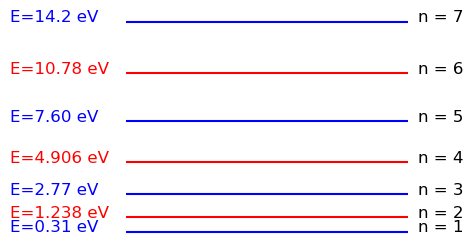

In [31]:
def fR(m,a,U0):
    return math.sqrt((m*U0*a**2)/(2*hb**2))
def fE(x): # em eV
    return ((2*hb**2*x**2)/(m*a**2))/e
def fF(x):
    return math.sqrt(R**2-x**2)-x*math.tan(x)
def fD(x):
    return math.sqrt(R**2-x**2)+x/math.tan(x)
def energias_poco(m,a,U0,R): # melhorar os intervalors (diminuir, é possível!)
    dx = 10**-3
    EF = [] # Lista para colocar as energias da classe F
    j = 0
    while R > j*math.pi:
        xe = j*math.pi+dx; xd = (2*j+1)*(math.pi/2)-dx
        if xd > R-dx:
            xd = R-dx
        xr, er = bissection(fF, xe, xd, err, Nm)
        if er == 1:
            EF.append(fE(xr))
            #print('xe = ',xe,', xd = ',xd,', xr = ',xr)
        j += 1
    #print('nF = ',len(EF), ', EF = ',EF)
    ED = [] # Lista para colocar as energias da classe D
    j = 0
    while R > (2*j+1)*(math.pi/2):
        xe = (2*j+1)*(math.pi/2)+dx; xd = (j+1)*math.pi-dx
        if xd > R-dx:
            xd = R-dx
        xr, er = bissection(fD, xe, xd, err, Nm)
        if er == 1:
            ED.append(fE(xr))
            #print('xe = ',xe,', xd = ',xd,', xr = ',xr)
        j += 1
    #print('nD = ',len(ED), ', ED = ',ED)
    return EF,ED
err = 10**-8; Nm = 10**4 # parâmetros para a bissecção
a = 10**-9; U0 = 15*e; m = me; R = fR(m,a,U0); print('R = ',R)
EF, ED = energias_poco(me,a,U0,R);
print('nF = ',len(EF),', EF = ',EF); 
print('nD = ',len(ED),', ED = ',ED)
def poco_niveis(xmin,xmax):
    matplotlib.rcParams.update({'font.size':12})
    plt.figure(figsize = (4,3), dpi = 100)
    nF = len(EF); nD = len(ED)
    for j in range(0,nF):
        plt.hlines(EF[j],xmin+0.15,xmax,color='blue'); 
        plt.text(-0.2,EF[j],'E='+str(EF[j])[0:4]+' eV',color='blue')
        plt.text(1.03,EF[j],'n = '+str(2*j+1),color='black')
    for j in range(0,nD):
        plt.hlines(ED[j],xmin+0.15,xmax,color='red'); 
        plt.text(-0.2,ED[j],'E='+str(ED[j])[0:5]+' eV',color='red')
        plt.text(1.03,ED[j],'n = '+str(2*j+2),color='black')
    plt.axis('off'); plt.show()
poco_niveis(0,1)

### Funções de onda
Lembrando, temos que
\begin{equation}
\Xi_{e}(x<0)=c_{ed}e^{k_{d}x} \text{, } \Xi_{i}(0<x<a)=c_{id}e^{ik_{i}x}+c_{ie}e^{-ik_{i}x} \text{ e } \Xi_{d}(x>a)=c_{de}e^{-k_{d}x}.
\end{equation}

A normalização da função de onda implica que
\begin{align}
& 1 = \int_{-\infty}^{+\infty}|\Xi(x)|^{2}dx = \int_{-\infty}^{0}|\Xi_{e}(x)|^{2}dx + \int_{0}^{a}|\Xi_{i}(x)|^{2}dx + \int_{a}^{\infty}|\Xi_{d}(x)|^{2}dx \\
&=: I_{e} + I_{i} + I_{d}.
\end{align}
Teremos assim
\begin{align}
& I_{e} = \int_{-\infty}^{+\infty}|\Xi(x)|^{2}dx = \int_{-\infty}^{0}|c_{ed}|^{2}e^{2k_{d}x}dx = |c_{ed}|^{2}\left[\frac{e^{2k_{d}x}}{2k_{d}}\right]_{-\infty}^{0}  \\
& = \frac{|c_{ed}|^{2}}{2k_{d}}\left(e^{0}-e^{-\infty}\right) = \frac{|c_{ed}|^{2}}{2k_{d}}, \\
& I_{d} = \int_{a}^{\infty}|\Xi_{d}(x)|^{2}dx = \int_{a}^{\infty}|c_{de}|^{2}e^{-2k_{d}x}dx = |c_{de}|^{2}\left[\frac{e^{-2k_{d}x}}{-2k_{d}}\right]_{a}^{\infty}  \\
& = \frac{|c_{de}|^{2}}{-2k_{d}}\left(e^{-\infty}-e^{-2k_{d}a}\right) = \frac{|c_{de}|^{2}e^{-2k_{d}a}}{2k_{d}}.
\end{align}

Para a outra integral, primeiramente calculemos
\begin{align}
|\Xi_{i}|^{2} & = \Xi_{i}\Xi_{i}^{*} \\
& = \left(c_{id}e^{ik_{i}x}+c_{ie}e^{-ik_{i}x}\right)\left(c_{id}^{*}e^{-ik_{i}x}+c_{ie}^{*}e^{ik_{i}x}\right) \\
& = |c_{id}|^{2} + c_{id}c_{ie}^{*}e^{2ik_{i}x} + c_{ie}c_{id}^{*}e^{-2ik_{i}x} + |c_{ie}|^{2} = |c_{id}|^{2} + |c_{ie}|^{2} + 2\Re\left(c_{id}c_{ie}^{*}e^{2ik_{i}x}\right) \\
& = |c_{id}|^{2} + |c_{ie}|^{2} + 2\left(\Re(c_{id}c_{ie}^{*})\Re\left(e^{2ik_{i}x}\right)-\Im(c_{id}c_{ie}^{*})\Im\left(e^{2ik_{i}x}\right)\right) \\
& = |c_{id}|^{2} + |c_{ie}|^{2} + 2\left(\Re(c_{id}c_{ie}^{*})\cos(2k_{i}x)-\Im(c_{id}c_{ie}^{*})\sin(2k_{i}x)\right).
\end{align}
Assim
\begin{align}
I_{i} & = \int_{0}^{a}|\Xi_{i}(x)|^{2}dx \\
&= (|c_{id}|^{2} + |c_{ie}|^{2})\int_{0}^{a}dx + 2\Re(c_{id}c_{ie}^{*})\int_{0}^{a}\cos(2k_{i}x)dx-2\Im(c_{id}c_{ie}^{*})\int_{0}^{a}\sin(2k_{i}x)dx \\
&= (|c_{id}|^{2} + |c_{ie}|^{2})[x]_{0}^{a} + 2\Re(c_{id}c_{ie}^{*})\left[\frac{\sin(2k_{i}x)}{2k_{i}}\right]_{0}^{a}+2\Im(c_{id}c_{ie}^{*})\left[\frac{\cos(2k_{i}x)}{2k_{i}}\right]_{0}^{a} \\
&= (|c_{id}|^{2} + |c_{ie}|^{2})a + \Re(c_{id}c_{ie}^{*}/k_{i})\left(\sin(2k_{i}a)-\sin(0)\right)+\Im(c_{id}c_{ie}^{*}/k_{i})\left(\cos(2k_{i}a)-\cos(0)\right) \\
&= (|c_{id}|^{2} + |c_{ie}|^{2})a + \Re(c_{id}c_{ie}^{*})\sin(2k_{i}a)/k_{i}+\Im(c_{id}c_{ie}^{*})\left(\cos(2k_{i}a)-1\right)/k_{i}.
\end{align}

Lembrando,
\begin{align}
& c_{ie} = \frac{ik_{i}-k_{d}}{ik_{i}+k_{d}}c_{id}=\frac{(ik_{i}-k_{d})}{(ik_{i}+k_{d})}\frac{(-ik_{i}+k_{d})}{(-ik_{i}+k_{d})}c_{id}=\frac{k_{i}^{2}-k_{d}^{2}+i2k_{i}k_{d}}{k_{i}^{2}+k_{d}^{2}}c_{id},\\
& c_{ed} = \frac{2ik_{i}}{ik_{i}+k_{d}}c_{id} \therefore |c_{ed}|^{2} = \frac{4k_{i}^{2}}{k_{i}^{2}+k_{d}^{2}}|c_{id}|^{2}, \\
& |c_{ed}|^{2}:=|c_{de}|^{2}e^{-2k_{d}a}.
\end{align}

Temos assim que
\begin{equation}
|c_{ie}|=|c_{id}|\text{, }|c_{ed}|^{2}=\frac{4k_{i}^{2}}{k_{i}^{2}+k_{d}^{2}}|c_{id}|^{2}\text{, }\Re(c_{ed})=\frac{2k_{i}^{2}}{k_{i}^{2}+k_{d}^{2}}c_{id}\text{ e }\Im(c_{ed})=\frac{2k_{i}k_{d}}{k_{i}^{2}+k_{d}^{2}}c_{id}.
\end{equation}
Por simplicidade, vamos assumir que $c_{id}\in\mathbb{R}$, obtendo assim
\begin{align}
& I_{e}+I_{i}+I_{d}= 1,\\
& \therefore\frac{|c_{ed}|^{2}}{2k_{d}} + (|c_{id}|^{2} + |c_{ie}|^{2})a + \frac{\Re(c_{id}c_{ie}^{*})\sin(2k_{i}a)}{k_{i}}+\frac{\Im(c_{id}c_{ie}^{*})\left(\cos(2k_{i}a)-1\right)}{k_{i}} + \frac{|c_{de}|^{2}e^{-2k_{d}a}}{2k_{d}} = 1, \\
& \therefore\frac{|c_{ed}|^{2}}{k_{d}} + 2c_{id}^{2}a + \frac{c_{id}}{k_{i}}\left(\Re(c_{ie})\sin(2k_{i}a)-\Im(c_{ie})\left(\cos(2k_{i}a)-1\right)\right) = 1, \\
& \therefore\frac{\frac{4k_{i}^{2}}{k_{i}^{2}+k_{d}^{2}}c_{id}^{2}}{k_{d}} + 2c_{id}^{2}a + \frac{c_{id}}{k_{i}}\left(\frac{k_{i}^{2}-k_{d}^{2}}{k_{i}^{2}+k_{d}^{2}}c_{id}\sin(2k_{i}a)-\frac{2k_{i}k_{d}}{k_{i}^{2}+k_{d}^{2}}c_{id}\left(\cos(2k_{i}a)-1\right)\right) = 1, \\
& \therefore c_{id}^{2} = \frac{k_{i}^{2}+k_{d}^{2}}{2a(k_{i}^{2}+k_{d}^{2})+(k_{i}^{2}-k_{d}^{2})\sin(2k_{i}a)/k_{i}-2k_{d}\cos(2k_{i}a)+4k_{i}^{2}/k_{d}+2k_{d}}.
\end{align}
Com isso, temos todos os coeficientes escritos em termos de $E,U_{0},m\text{ e }a$.

Abaixo faremos um gráficos das densidades de probabilidade. Para tal, lembramos que $k_{i}=\sqrt{2mE}/\hbar$, $k_{d}=\sqrt{2m(U_{0}-E)}/\hbar$ e que
\begin{cases}
|\Xi_{e}|^{2}(x<0) = |c_{ed}|^{2}e^{2k_{d}x} = \frac{4k_{i}^{2}}{k_{i}^{2}+k_{d}^{2}}e^{2k_{d}x}c_{id}^{2}, \\
|\Xi_{i}|^{2}(0<x<a) = 2c_{id}^{2}\left(1+\frac{k_{i}^{2}-k_{d}^{2}}{k_{i}^{2}+k_{d}^{2}}\cos(2k_{i}x)+\frac{2k_{i}k_{d}}{k_{i}^{2}+k_{d}^{2}}\sin(2k_{i}x)\right)\\
|\Xi_{d}|^{2}(x<0) = |c_{de}|^{2}e^{-2k_{d}x}.
\end{cases}

In [37]:
def psi2_poco(n):
    if n%2 == 0:
        j = int((n-2)/2); E = ED[j] 
    else:
        j = int((n-1)/2); E = EF[j]
    E = E*e#; print('E = ',E) # E em Joules
    ki = math.sqrt(2*m*E)/hb; 
    kd = math.sqrt(2*m*(U0-E))/hb#; print('ki = ',ki,', kd = ',kd)
    cid2 = (ki**2+kd**2)/\
    (2*a*(ki**2+kd**2)+(ki**2-kd**2)*math.sin(2*ki*a)/ki-2*kd*math.cos(2*ki*a)\
     +4*ki**2/kd + 2*kd)
    ced2 = ((4*ki**2)/(ki**2+kd**2))*cid2
    N = 1000; xmin = -a; xmax = 2*a; dx = (xmax-xmin)/N; 
    x = np.zeros(N); y = np.zeros(N)
    for j in range(0,N):
        x[j] = xmin + j*dx
        if x[j] < 0:
            y[j] = ced2*math.exp(2*kd*x[j])
        elif x[j] >= 0 and x[j] < a:
            y[j] = 2*cid2*(1+((ki**2-kd**2)/(ki**2+kd**2))*math.cos(2*ki*x[j])\
                              +((2*ki*kd)/(ki**2+kd**2))*math.sin(2*ki*x[j]))
        elif x[j] >= a:
            y[j] = ced2*math.exp(-2*kd*(x[j]-a))#; print(x[j],y[j])
    matplotlib.rcParams.update({'font.size':12})
    plt.figure(figsize = (8,3), dpi = 100)
    plt.plot(x,y); plt.xlabel(r'$x$',fontsize=10); 
    plt.ylabel(r'$|\Xi|^{2}$',fontsize=15)
    plt.annotate(r'$a=$'+str(a), xy=(a,0), xytext=(a,0), fontsize=12)
    plt.title('n = '+str(n))
    plt.xlim(xmin,xmax); ym = 1.02*np.amax(y); plt.ylim(0,ym)
    plt.annotate("", xy=(0,0), xytext=(0,ym), 
                 arrowprops=dict(arrowstyle="-"))
    plt.annotate("", xy=(a,0), xytext=(a,ym), 
                 arrowprops=dict(arrowstyle="-"))
    plt.show()
err = 10**-8; Nm = 10**4 # parâmetros para a bissecção
U0 = 15*e; a = 10**-9; m = me; R = fR(m,a,U0); 
EF,ED = energias_poco(m,a,U0,R); nt = len(EF)+len(ED); print(nt)
interactive(psi2_poco, n=(1,nt,1))

7


interactive(children=(IntSlider(value=4, description='n', max=7, min=1), Output()), _dom_classes=('widget-inte…

---
# Exercícios

$1.$ Calcule o valor do coeficiente de transmissão para um elétron de energia $E=4\text{ eV}$ em um poço quadrado finito com $U_{0}=2\text{ eV}$ e larguras $a=1\text{ nm}$ e $a=1\text{ }\mathring{A}$.

$2.$ Para $c_{ie} = \frac{ik_{i}-k_{d}}{ik_{i}+k_{d}}c_{id}$, verifique que $|c_{ie}|=|c_{id}|$.

$3.$ Verifique que a onda estacionária $\Xi_{i}(x)=A\sin(k_{i}x)+B\cos(k_{i}x)$ satisfaz a EqSIT1D dentro do poço, i.e., para $0<x<a$.

$4.$ Verifique que a condição $\sin\left(\frac{k_{i}a}{2}\right)\ne 0$ é equivalente à condição $E\ne4\left(\frac{\pi^{2}\hbar^{2}}{2ma^{2}}\right)n^{2}$ com $n=1,2,3,\cdots.$

$5.$ Verifique que a condição $\cos\left(\frac{k_{i}a}{2}\right)\ne 0$ é equivalente à condição $E\ne\left(\frac{\pi^{2}\hbar^{2}}{2ma^{2}}\right)n^{2}$ com $n=1,3,5,\cdots.$

$6.$ Uma vez que as energias do quanton em um poço quadrado finito são $E = \left(\frac{2\hbar^{2}}{ma^{2}}\right)x^{2}$, verifique que, para que as condições obtidas nos problemas 4 e 5 sejam respeitadas, $x$ não pode assumir os valores $x\ne n\pi$, com $n=1,2,3,\cdots$, e $x\ne\frac{n\pi}{2}$, com $n=1,3,5,\cdots$, respectivamente.

$7.$ Isole $c_{de}$ em uma das eqs. ($**$) ou ($\star\star$) e substitua na outra para obter
\begin{equation}
c_{ie} = \frac{ik_{i}+k_{d}}{ik_{i}-k_{d}}e^{2ik_{i}a}c_{id}.
\end{equation}
Verifique que neste caso também temos que $|c_{ie}|=|c_{id}|$. Substitua $c_{ie}$ em ($**$) ou em ($\star\star$) para obter
\begin{equation}
c_{de} = \frac{2ik_{i}e^{(ik_{i}+k_{d})a}}{ik_{i}-k_{d}}c_{id}.
\end{equation}

$8.$ Substituindo o $c_{ie}$ da última questão em $\Xi_{i}(0<x<a)=c_{id}e^{ik_{i}x}+c_{ie}e^{-ik_{i}x}$, obtenha a onda estacionária
\begin{equation}
\Xi_{i}(0<x<a) = \frac{2ik_{i}c_{id}e^{ik_{i}a}}{ik_{i}-k_{d}}\left(\cos(k_{i}(x-a))-\frac{k_{d}}{k_{i}}\sin(k_{i}(x-a))\right).
\end{equation}

$9.$ Substitua $c_{ie}$ do problema 7 na eq. ($\star$) para obter
\begin{equation}
c_{ed} = \frac{2ik_{i}c_{id}e^{ik_{i}a}}{ik_{i}-k_{d}}\left(\cos(k_{i}a)+\frac{k_{d}}{k_{i}}\sin(k_{i}a)\right).
\end{equation}
Impondo $|c_{ed}|^{2}:=|c_{de}|^{2}e^{-2k_{d}a}$, e usando o $c_{de}$ do problema 7, obtenha a eq. trascendental
\begin{equation}
k_{d}=k_{i}\tan\left(\frac{k_{i}a}{2}\right).
\end{equation}

$10.$ Substitua $c_{ie}$ do problema 7 na eq. ($*$) para obter
\begin{equation}
c_{ed} = \frac{-2ik_{i}c_{id}e^{ik_{i}a}}{ik_{i}-k_{d}}\left(\cos(k_{i}a)-\frac{k_{i}}{k_{d}}\sin(k_{i}a)\right).
\end{equation}
Impondo $|c_{ed}|^{2}=|c_{de}|^{2}e^{-2k_{d}a}$, usando o $c_{de}$ do problema 7, obtenha a eq. trascendental
\begin{equation}
-k_{d}=k_{i}\cot\left(\frac{k_{i}a}{2}\right).
\end{equation}

$11.$ Usando os coeficientes obtidos no problema 7 e a condição usada no problema 9, aplique normalização para obter $c_{id}^{2}$.